# Descriptive Analysis

In [59]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan,when,count

In [61]:
# May take awhile locally
spark = SparkSession.builder.appName("Operations").getOrCreate()

In [62]:
# Importing dataset
df = pd.read_csv("C:/Users/user/Downloads/archive (2)/fh_5yrs.csv")

In [63]:
df

,date,volume,open,high,low,close,adjclose,symbol
0,2020-07-02,257500,17.639999,17.740000,17.620001,17.709999,17.709999,AAAU
1,2020-07-01,468100,17.730000,17.730000,17.540001,17.680000,17.680000,AAAU
2,2020-06-30,319100,17.650000,17.799999,17.610001,17.780001,17.780001,AAAU
3,2020-06-29,405500,17.670000,17.690001,17.629999,17.680000,17.680000,AAAU
4,2020-06-26,335100,17.490000,17.670000,17.420000,17.670000,17.670000,AAAU
...,...,...,...,...,...,...,...,...
6852033,2015-01-12,10000,0.140000,0.140000,0.140000,0.140000,0.136302,ZYXI
6852034,2015-01-09,200,0.150000,0.150000,0.150000,0.150000,0.146038,ZYXI
6852035,2015-01-07,8100,0.140000,0.150000,0.130000,0.150000,0.146038,ZYXI
6852036,2015-01-05,33200,0.220000,0.220000,0.140000,0.160000,0.155774,ZYXI


In [64]:
df.symbol.unique()

array(['AAAU', 'AACG', 'AADR', ..., 'ZYME', 'ZYNE', 'ZYXI'], dtype=object)

In [65]:
#Load data into spark 
data = spark.read.csv('C:/Users/user/Downloads/archive (2)/fh_5yrs.csv', header = True)

In [66]:
data.show()

+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|      date|volume|              open|              high|               low|             close|          adjclose|symbol|
+----------+------+------------------+------------------+------------------+------------------+------------------+------+
|2020-07-02|257500|17.639999389648438|17.739999771118164|  17.6200008392334|17.709999084472656|17.709999084472656|  AAAU|
|2020-07-01|468100|17.729999542236328|17.729999542236328|17.540000915527347| 17.68000030517578| 17.68000030517578|  AAAU|
|2020-06-30|319100|17.649999618530273|17.799999237060547|17.610000610351562|17.780000686645508|17.780000686645508|  AAAU|
|2020-06-29|405500|17.670000076293945|17.690000534057614|  17.6299991607666| 17.68000030517578| 17.68000030517578|  AAAU|
|2020-06-26|335100|17.489999771118164|17.670000076293945|17.420000076293945|17.670000076293945|17.670000076293945|  AAAU|
|2020-06-25|246800|17.60

In [67]:
# information about the data: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6852038 entries, 0 to 6852037
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   volume    int64  
 2   open      float64
 3   high      float64
 4   low       float64
 5   close     float64
 6   adjclose  float64
 7   symbol    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 418.2+ MB


In [68]:
# description about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,6852038.0,1.015414e+06,4.833380e+06,1.000000,18700.000000,120600.000000,586300.000000,2.156725e+09
open,6852038.0,2.980861e+02,1.158088e+05,0.001000,11.950000,24.950001,47.900002,6.915530e+07
high,6852038.0,3.058757e+02,1.182161e+05,0.000000,12.130000,25.110001,48.349998,7.058858e+07
low,6852038.0,2.910136e+02,1.135286e+05,0.000000,11.750000,24.750000,47.410000,6.843866e+07
close,6852038.0,2.967831e+02,1.151575e+05,0.001000,11.940000,24.940001,47.900002,6.951362e+07
adjclose,6852038.0,2.932311e+02,1.143443e+05,-3.770961,10.776609,23.325796,45.389855,6.902224e+07


In [69]:
df.isna().sum()

date        0
volume      0
open        0
high        0
low         0
close       0
adjclose    0
symbol      0
dtype: int64

In [70]:
df.isna().sum().sum()

0

In [71]:
df['volume'].describe()

count    6.852038e+06
mean     1.015414e+06
std      4.833380e+06
min      1.000000e+00
25%      1.870000e+04
50%      1.206000e+05
75%      5.863000e+05
max      2.156725e+09
Name: volume, dtype: float64

In [72]:
# Let Spark know about the header and infer the Schema types!
df_amzn = spark.read.csv('C:/Users/user/Downloads/archive (2)/full_history/AMZN.csv',inferSchema=True,header=True)
df_nflx = spark.read.csv('C:/Users/user/Downloads/archive (2)/full_history/NFLX.csv',inferSchema=True,header=True)

In [73]:
amzn = pd.read_csv('C:/Users/user/Downloads/archive (2)/full_history/AMZN.csv')
len(amzn)

5822

In [128]:
nflx = pd.read_csv('C:/Users/user/Downloads/archive (2)/full_history/NFLX.csv')
len(nflx)

4551

In [75]:
print('AMAZON'.format(df_amzn.printSchema()))
print('NETFLIX'.format(df_nflx.printSchema()))

root
 |-- date: timestamp (nullable = true)
 |-- volume: integer (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- adjclose: double (nullable = true)

AMAZON
root
 |-- date: timestamp (nullable = true)
 |-- volume: integer (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- adjclose: double (nullable = true)

NETFLIX


In [76]:
amzn.describe()

,volume,open,high,low,close,adjclose
count,5.822000e+03,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,7.525202e+06,363.421480,367.477089,359.041160,363.478224,363.478224
std,7.293969e+06,564.670042,570.357358,558.507231,564.800681,564.800681
min,4.872000e+05,1.406250,1.447917,1.312500,1.395833,1.395833
25%,3.681750e+06,37.800834,38.500000,37.132501,37.871249,37.871249
50%,5.657150e+06,83.000000,84.695000,81.204998,82.985001,82.985001
75%,8.548225e+06,355.799988,359.634995,351.037506,356.209999,356.209999
max,1.043292e+08,2912.010010,2955.560059,2871.100098,2890.300049,2890.300049


In [77]:
amzn.head()

,date,volume,open,high,low,close,adjclose
0,2020-07-02,6586000,2912.010010,2955.560059,2871.100098,2890.300049,2890.300049
1,2020-07-01,6363400,2757.989990,2895.000000,2754.000000,2878.699951,2878.699951
2,2020-06-30,3769700,2685.070068,2769.629883,2675.030029,2758.820068,2758.820068
3,2020-06-29,4223400,2690.010010,2696.800049,2630.080078,2680.379883,2680.379883
4,2020-06-26,6500800,2775.060059,2782.570068,2688.000000,2692.870117,2692.870117


In [78]:
amzn.tail()

,date,volume,open,high,low,close,adjclose
5817,1997-05-21,18853200,1.635417,1.645833,1.375000,1.427083,1.427083
5818,1997-05-20,5467200,1.729167,1.750000,1.635417,1.635417,1.635417
5819,1997-05-19,6106800,1.760417,1.770833,1.625000,1.708333,1.708333
5820,1997-05-16,14700000,1.968750,1.979167,1.708333,1.729167,1.729167
5821,1997-05-15,72156000,2.437500,2.500000,1.927083,1.958333,1.958333


In [79]:
df_amzn.show()

+-------------------+-------+-----------------+-----------------+-----------------+-----------------+-----------------+
|               date| volume|             open|             high|              low|            close|         adjclose|
+-------------------+-------+-----------------+-----------------+-----------------+-----------------+-----------------+
|2020-07-02 00:00:00|6586000|2912.010009765625| 2955.56005859375| 2871.10009765625|2890.300048828125|2890.300048828125|
|2020-07-01 00:00:00|6363400|2757.989990234375|           2895.0|           2754.0|2878.699951171875|2878.699951171875|
|2020-06-30 00:00:00|3769700|2685.070068359375|  2769.6298828125|2675.030029296875|2758.820068359375|2758.820068359375|
|2020-06-29 00:00:00|4223400|2690.010009765625|2696.800048828125|   2630.080078125|  2680.3798828125|  2680.3798828125|
|2020-06-26 00:00:00|6500800| 2775.06005859375|2782.570068359375|           2688.0|  2692.8701171875|  2692.8701171875|
|2020-06-25 00:00:00|2968700|2739.550048

In [80]:
df_amzn.describe('open').show()

+-------+-----------------+
|summary|             open|
+-------+-----------------+
|  count|             5822|
|   mean|363.4214801574155|
| stddev|564.6700415802453|
|    min|          1.40625|
|    max|2912.010009765625|
+-------+-----------------+



In [81]:
df_amzn.describe('close').show()

+-------+------------------+
|summary|             close|
+-------+------------------+
|  count|              5822|
|   mean| 363.4782236570429|
| stddev| 564.8006810914623|
|    min|1.3958333730697632|
|    max| 2890.300048828125|
+-------+------------------+



In [82]:
nflx.head()

,date,volume,open,high,low,close,adjclose
0,2020-06-19,5934500,449.119995,453.970001,445.600006,453.720001,453.720001
1,2020-06-18,4277600,448.730011,452.760010,442.799988,449.869995,449.869995
2,2020-06-17,6522400,441.820007,450.459991,439.220001,447.769989,447.769989
3,2020-06-16,5507900,425.760010,437.959991,425.179993,436.130005,436.130005
4,2020-06-15,4467900,421.399994,426.489990,415.420013,425.500000,425.500000


In [83]:
nflx.tail()

,date,volume,open,high,low,close,adjclose
4546,2002-05-30,10154200,1.107857,1.107857,1.071429,1.071429,1.071429
4547,2002-05-29,6757800,1.164286,1.164286,1.085714,1.103571,1.103571
4548,2002-05-28,6609400,1.213571,1.232143,1.157143,1.157143,1.157143
4549,2002-05-24,11104800,1.214286,1.225000,1.197143,1.210000,1.210000
4550,2002-05-23,104790000,1.156429,1.242857,1.145714,1.196429,1.196429


In [84]:
df_nflx.show()

+-------------------+--------+------------------+------------------+------------------+------------------+------------------+
|               date|  volume|              open|              high|               low|             close|          adjclose|
+-------------------+--------+------------------+------------------+------------------+------------------+------------------+
|2020-06-19 00:00:00| 5934500| 449.1199951171875| 453.9700012207031| 445.6000061035156| 453.7200012207031| 453.7200012207031|
|2020-06-18 00:00:00| 4277600| 448.7300109863281|  452.760009765625|442.79998779296875| 449.8699951171875| 449.8699951171875|
|2020-06-17 00:00:00| 6522400|441.82000732421875| 450.4599914550781| 439.2200012207031| 447.7699890136719| 447.7699890136719|
|2020-06-16 00:00:00| 5507900|  425.760009765625| 437.9599914550781|425.17999267578125| 436.1300048828125| 436.1300048828125|
|2020-06-15 00:00:00| 4467900| 421.3999938964844|  426.489990234375| 415.4200134277344|             425.5|            

In [85]:
df_amzn.agg({'Open': 'max'}).show()
df_amzn.agg({'Close': 'max'}).show()
df_amzn.agg({'Open': 'min'}).show()
df_amzn.agg({'Close': 'min'}).show()

+-----------------+
|        max(Open)|
+-----------------+
|2912.010009765625|
+-----------------+

+-----------------+
|       max(Close)|
+-----------------+
|2890.300048828125|
+-----------------+

+---------+
|min(Open)|
+---------+
|  1.40625|
+---------+

+------------------+
|        min(Close)|
+------------------+
|1.3958333730697632|
+------------------+



In [86]:
df_nflx.agg({'Open': 'max'}).show()
df_nflx.agg({'Close': 'max'}).show()
df_nflx.agg({'Open': 'min'}).show()
df_nflx.agg({'Close': 'min'}).show()

+---------+
|max(Open)|
+---------+
|   454.25|
+---------+

+------------------+
|        max(Close)|
+------------------+
|454.19000244140625|
+------------------+

+-------------------+
|          min(Open)|
+-------------------+
|0.37785714864730835|
+-------------------+

+-------------------+
|         min(Close)|
+-------------------+
|0.37285715341567993|
+-------------------+



In [87]:
amzn['date'] = pd.to_datetime(amzn['date'])

In [88]:
nflx['date'] = pd.to_datetime(nflx['date'])

In [89]:
amzn.reset_index(inplace = True)
amzn.set_index('date',inplace = True)
nflx.reset_index(inplace = True)
nflx.set_index('date',inplace = True)

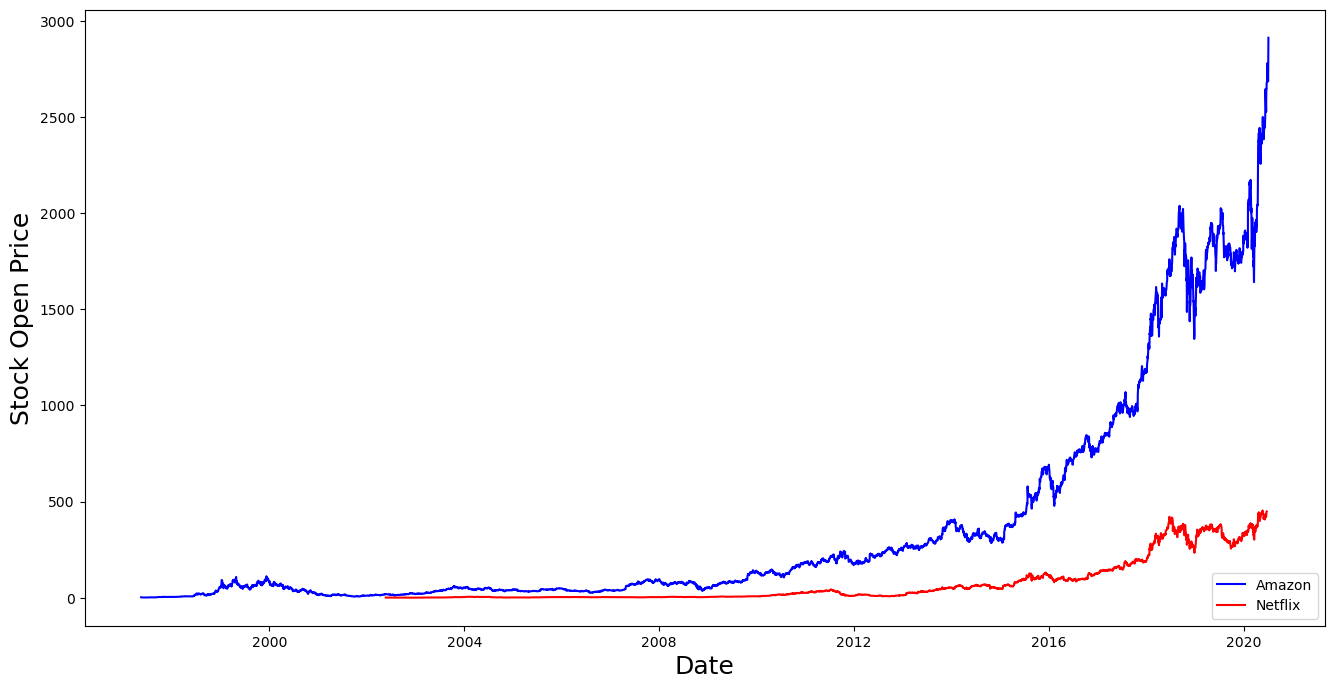

In [90]:
plt.figure(figsize=(16,8))
plt.plot(amzn['open'],color = 'blue')
plt.plot(nflx['open'],color = 'red')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Stock Open Price',fontsize = 18)
plt.legend(['Amazon','Netflix'],loc = 'lower right')
plt.show()

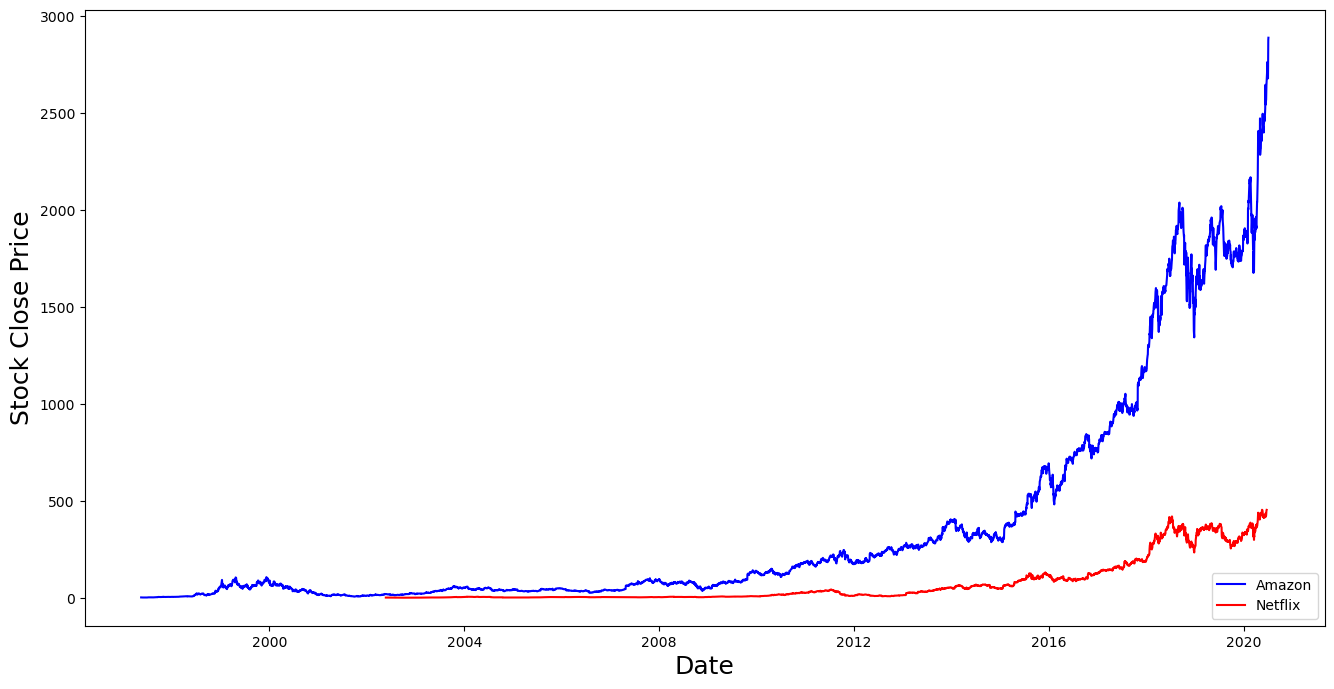

In [91]:
plt.figure(figsize=(16,8))
plt.plot(amzn['close'],color = 'blue')
plt.plot(nflx['close'],color = 'red')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Stock Close Price',fontsize = 18)
plt.legend(['Amazon','Netflix'],loc = 'lower right')
plt.show()


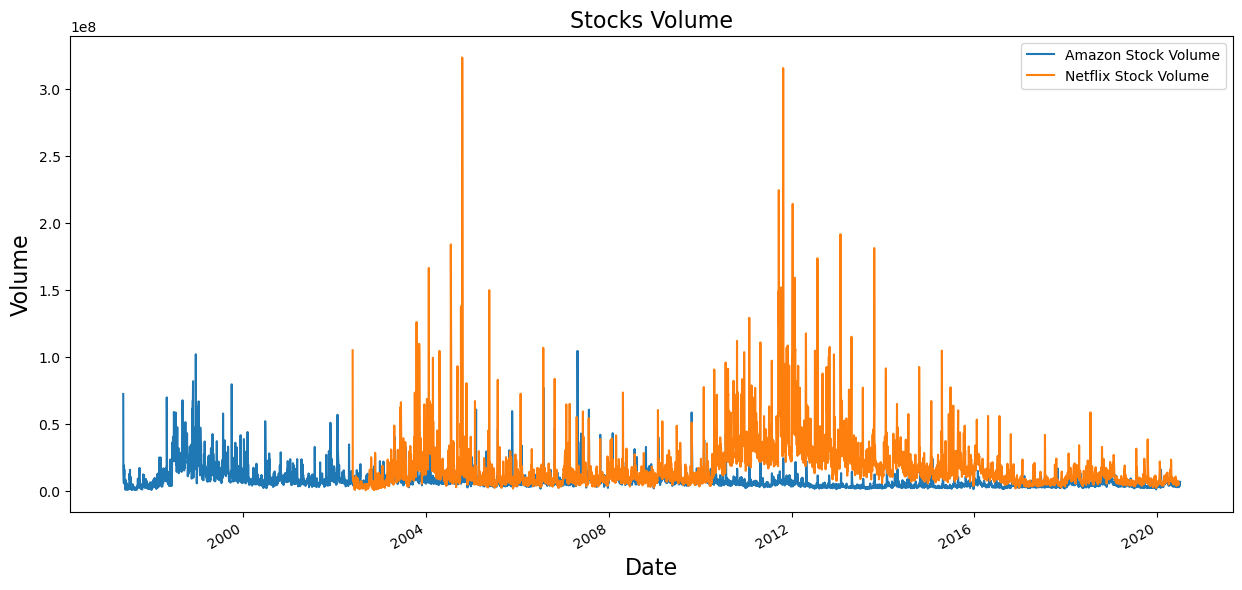

In [124]:
#plotting for voulume of stocks
amzn['volume'].plot(label = 'Amazon Stock Volume',figsize=(15,7))
nflx['volume'].plot(label = 'Netflix Stock Volume')
plt.legend()
plt.title('Stocks Volume',fontsize=16)
plt.ylabel('Volume',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.show()

In [121]:
amzn['Total Traded']= amzn['open']*amzn['volume']
amzn.head()

,index,volume,open,high,low,close,adjclose,Total Traded
date,,,,,,,,
2020-07-02,0,6586000,2912.010010,2955.560059,2871.100098,2890.300049,2890.300049,1.917850e+10
2020-07-01,1,6363400,2757.989990,2895.000000,2754.000000,2878.699951,2878.699951,1.755019e+10
2020-06-30,2,3769700,2685.070068,2769.629883,2675.030029,2758.820068,2758.820068,1.012191e+10
2020-06-29,3,4223400,2690.010010,2696.800049,2630.080078,2680.379883,2680.379883,1.136099e+10
2020-06-26,4,6500800,2775.060059,2782.570068,2688.000000,2692.870117,2692.870117,1.804011e+10


In [122]:
nflx['Total Traded']= nflx['open']*nflx['volume']
nflx.head()

,index,volume,open,high,low,close,adjclose,Total Traded
date,,,,,,,,
2020-06-19,0,5934500,449.119995,453.970001,445.600006,453.720001,453.720001,2.665303e+09
2020-06-18,1,4277600,448.730011,452.760010,442.799988,449.869995,449.869995,1.919487e+09
2020-06-17,2,6522400,441.820007,450.459991,439.220001,447.769989,447.769989,2.881727e+09
2020-06-16,3,5507900,425.760010,437.959991,425.179993,436.130005,436.130005,2.345044e+09
2020-06-15,4,4467900,421.399994,426.489990,415.420013,425.500000,425.500000,1.882773e+09


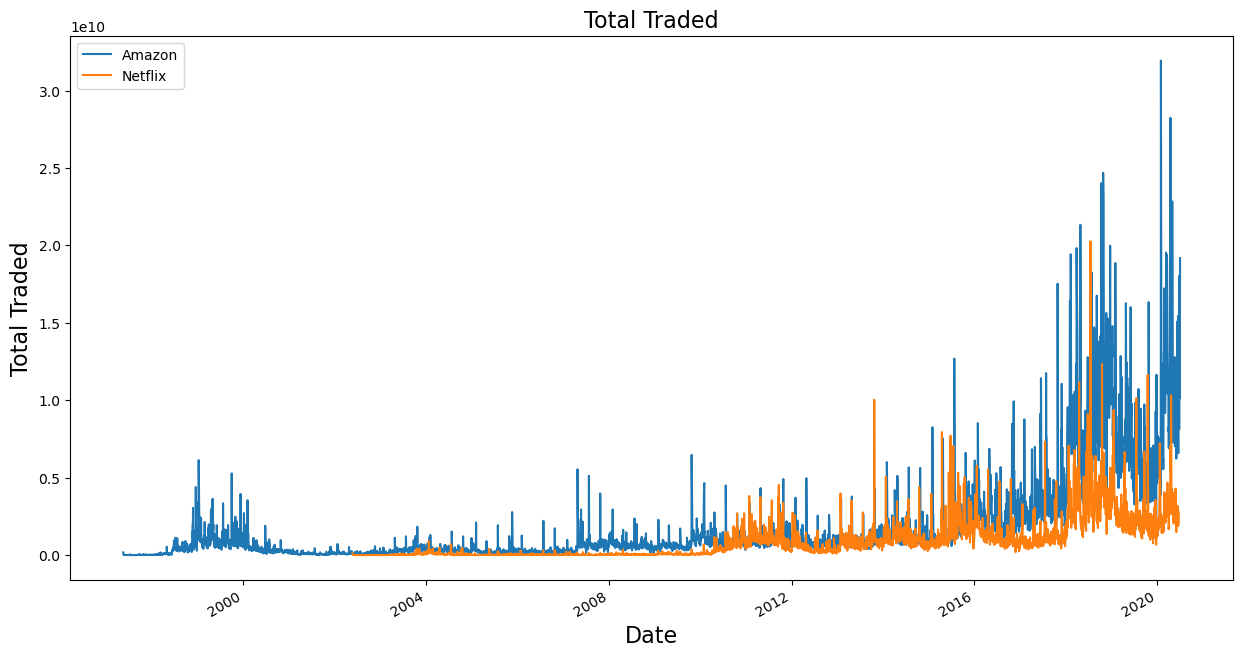

In [125]:
amzn['Total Traded'].plot(label ='Amazon', figsize=(15,8))
nflx['Total Traded'].plot(label = 'Netflix')
plt.legend()
plt.title('Total Traded',fontsize=16)
plt.ylabel('Total Traded',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.show()


# Predictive Analysis

In [106]:
output_var = pd.DataFrame(nflx['close']) 
# set target variable, which will be used as the value that will be predicted by the LSTM model.

In [107]:
features = ['open', 'high', 'low', 'volume']
# independent variables to the target variable above

In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import linear_model

from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [109]:
#Scaling the csv values down to cut down on memory consumption 
scaler = MinMaxScaler()
feature_tf = scaler.fit_transform(nflx[features])
feature_tf = pd.DataFrame(columns = features, data = feature_tf, index = nflx.index)
feature_tf.head()

,open,high,low,volume
date,,,,
2020-06-19,0.988697,0.989096,0.989181,0.017482
2020-06-18,0.987838,0.986458,0.982960,0.012354
2020-06-17,0.972613,0.981442,0.975007,0.019301
2020-06-16,0.937229,0.954183,0.943815,0.016162
2020-06-15,0.927623,0.929169,0.922133,0.012943


In [110]:
#Splits the csv data into sets for training the model (90% of the data) and testing the model (10% of the data)
timesplit = TimeSeriesSplit(n_splits=10) 
for train_index, test_index in timesplit.split(feature_tf):
        X_train, X_test = feature_tf[:len(train_index)], feature_tf[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [111]:
# processing the data for the LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [112]:
X_train.shape

(4138, 1, 4)

In [113]:
X_test.shape # displays the shape of X_train and X_test

(413, 1, 4)

In [114]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1)) 
lstm.compile(loss='mean_absolute_error', optimizer='adam')

In [115]:
model = lstm.fit(X_train, y_train, epochs = 150, batch_size = 8, verbose = 1)
# training the model on 150 epochs

Epoch 1/150
518/518 [==============================] - 3s 3ms/step - loss: 79.4751
Epoch 2/150
518/518 [==============================] - 1s 3ms/step - loss: 66.2275
Epoch 3/150
518/518 [==============================] - 1s 3ms/step - loss: 49.9263
Epoch 4/150
518/518 [==============================] - 1s 3ms/step - loss: 26.2233
Epoch 5/150
518/518 [==============================] - 1s 3ms/step - loss: 5.3764
Epoch 6/150
518/518 [==============================] - 2s 3ms/step - loss: 3.1151
Epoch 7/150
518/518 [==============================] - 2s 3ms/step - loss: 2.7778
Epoch 8/150
518/518 [==============================] - 1s 3ms/step - loss: 2.5256
Epoch 9/150
518/518 [==============================] - 1s 3ms/step - loss: 2.1956
Epoch 10/150
518/518 [==============================] - 1s 3ms/step - loss: 1.7975
Epoch 11/150
518/518 [==============================] - 1s 2ms/step - loss: 1.4489
Epoch 12/150
518/518 [==============================] - 1s 2ms/step - loss: 1.2163
Epoch 13/

In [116]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

13/13 [==============================] - 0s 3ms/step


In [117]:
MAE = metrics.mean_absolute_error(y_test, y_pred) # put the MAE of the model's product into the eponymous variable

In [118]:
MAE #display the MAE

0.044101665080603904

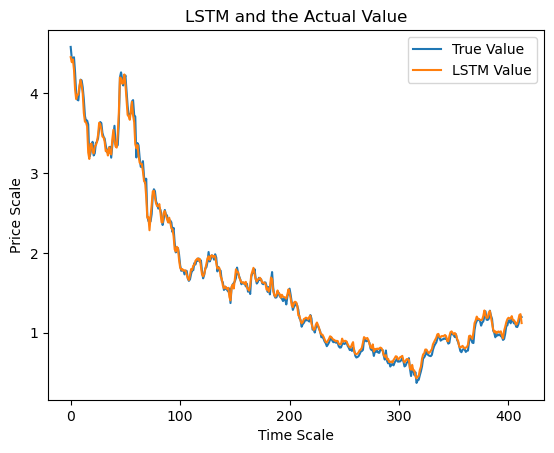

In [126]:
# Comparing the LSTM prediction and the actual value of the Adjusted for Close price via plot
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("LSTM and the Actual Value")
plt.xlabel('Time Scale')
plt.ylabel('Price Scale')
plt.legend()
plt.show()